In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# seaborn
import seaborn as sns

plt.rcParams["font.size"] = 13
plt.style.use('ggplot')
plt.style.use('seaborn-whitegrid')
from google.colab import files
files.upload()

## **2. 데이터 탐색(EDA)**

---
### **데이터 확인**
---

In [ ]:
df = pd.read_csv("FIFA_train.csv")
df.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [ ]:
df.describe()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8.932000e+03
mean,7966.775750,25.209136,1.130878,67.091133,71.997201,2.401702,2.778673e+06
std,4844.428521,4.635515,0.423792,6.854910,5.988147,0.776048,5.840982e+06
min,0.000000,16.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,3751.750000,21.000000,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,7696.500000,25.000000,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,12082.250000,28.000000,1.000000,72.000000,76.000000,3.000000,2.600000e+06
max,16948.000000,40.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB





* **INSIGHT**
  * .전체 데이터 개수가 8932개이고 속성은 12개이다.
  * .속성 중 예측값인 value, 단순순번 id 제외하면 10개의 독립변수(Features)가 있다.
  * .결측값이 있는 속성은 없다
  * .contract_until은 문자열이지만 이후 숫자타입으로 변환후 진행

['id', 'name', 'age', 'continent', 'contract_until', 'position', 'prefer_foot', 'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves', 'value']


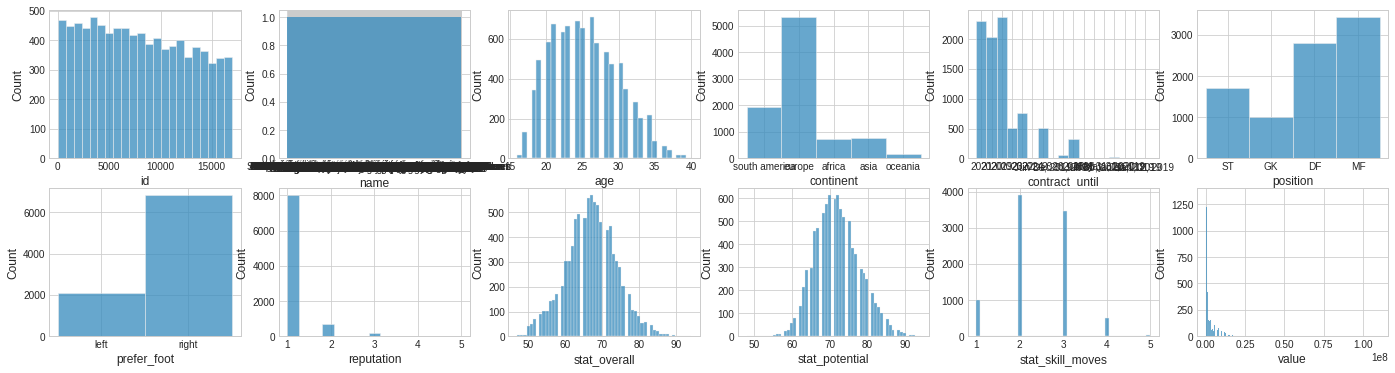

In [ ]:
f, ax = plt.subplots(2,6, figsize=(24,6))
ax = ax.flatten()
col_list = list(df.columns)
print(col_list)
for i in range(len(col_list)):
  sns.histplot(data=df, x= col_list[i],ax=ax[i])
plt.show()

* **INSIGHT**

  * 필요없는 값
    * 1. `id` : 선수 고유의 아이디
    * 2. `name` : 이름
  * 범주형 값
    * 4. `continent` : 선수들의 국적이 포함되어 있는 대륙입니다 (south america/europe/africa/asia/oceania)등의 (문자열 타입)
    * 5. `contract_until` : 선수의 계약기간이 언제까지인지 나타내어 줍니다 (문자열 타입)
    * 6. `position` : 선수가 선호하는 포지션입니다. (ST/GK/DF/MF)의 (문자열 타입)
    * 7. `prefer_foot` : 선수가 선호하는 발입니다. (left/right)의( 문자열타입)
    
  * 수치형 값
    * 3. `age` : 나이 (int)
    * 8. `reputation` : 선수가 유명한 정도입니다. ex) 높은 수치일 수록 유명한 선수 (1,2,3,4,5)의 정수 타입
    * 9. `stat_overall` : 선수의 현재 능력치 입니다. (int)
    * 10.`stat_potential` : 선수가 경험 및 노력을 통해 발전할 수 있는 정도입니다.(int)
    * 11.`stat_skill_moves` : 선수의 개인기 능력치 입니다. (1,2,3,4,5)의 정수 타입
  * 예측값
    * 12. `value` :  FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로) 입니다. (flaot)






.


['continent', 'contract_until', 'position', 'prefer_foot']


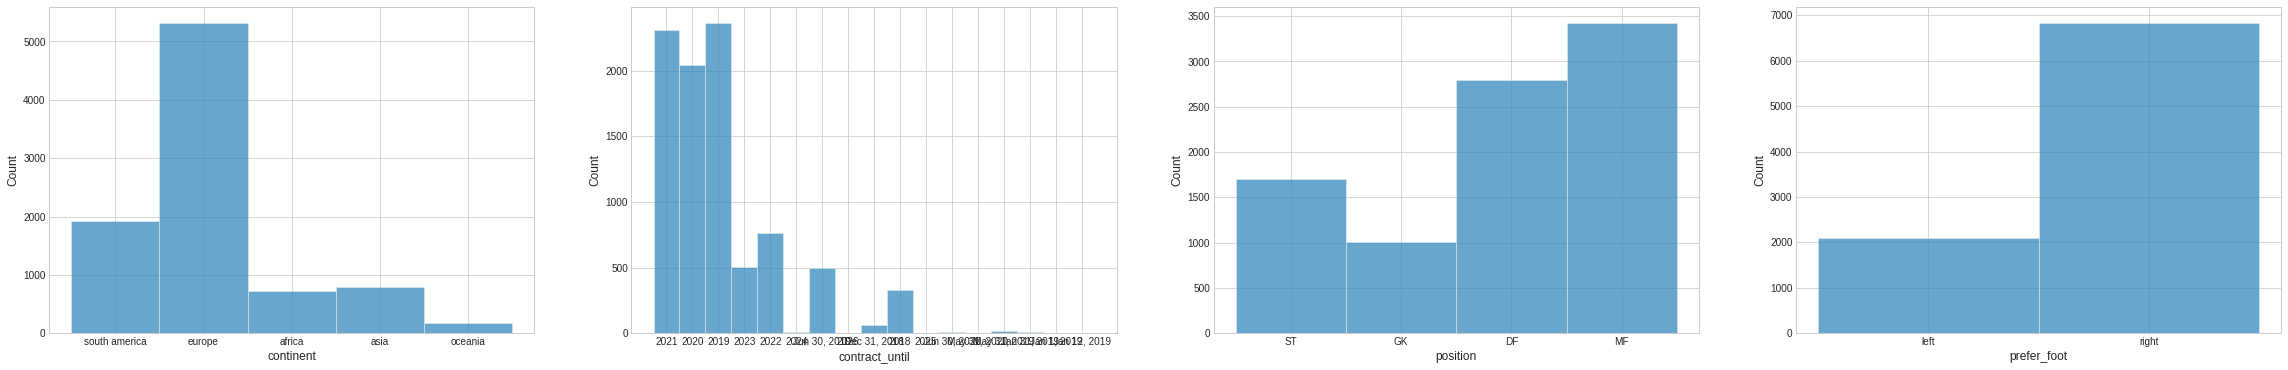

In [ ]:
f, ax = plt.subplots(1,4, figsize=(40,6))
ax = ax.flatten()
col_list = ["continent","contract_until","position","prefer_foot"]
print(col_list)
for i in range(len(col_list)):
  sns.histplot(data=df, x= col_list[i],ax=ax[i])
plt.show()


* **INSIGHT**

  * .모든 출신 대륙의 합보다 europe 출신 선수의 수가 더 많다
  * .남은 계약기간이 2021/2020/2019인 선수들이 대부분이다 그리고 이상치가 많아 주의가 필요해 보인다
  * .선호하는 발은 오른발이 왼발의 3배 이상이다 
  * .포지션은 4가지 카테고리이며 MF의 숫자가 가장 많지만 GK가 축구에서 필요한 인원 비율보다 많다

['age', 'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves']


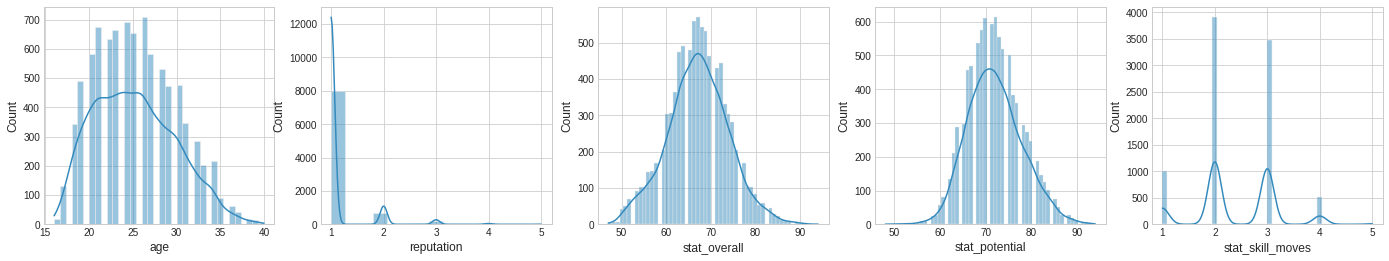

In [ ]:
f, ax = plt.subplots(1,5, figsize=(24,4))
ax = ax.flatten()
col_list = ["age","reputation","stat_overall","stat_potential","stat_skill_moves"]
print(col_list)
for i in range(len(col_list)):
  sns.histplot(data=df, x= col_list[i],ax=ax[i], kde=True)
plt.show()

* **INSIGHT**

  * .나이는 20세에서 27세가 가장많고 30세부터는 수치가 점점 더 크게 줄어든다
  * .유명한 정도는 1이 가장크고 5로 갈수록 큰 폭으로 줄어 드는 값이다
  * .선수의 능력치는 70을 중앙값으로 내려가는 수치를 가지고 있다
  * .potential 또한 선수의 현재 능력치와 비슷한 값을 보여준다
  * .기술 능력치는 2 와 3의 값이 가장높고 그 다음인 1은 2의 30%도 없고  5는 거의 없는 수준

['continent', 'contract_until', 'position', 'prefer_foot']


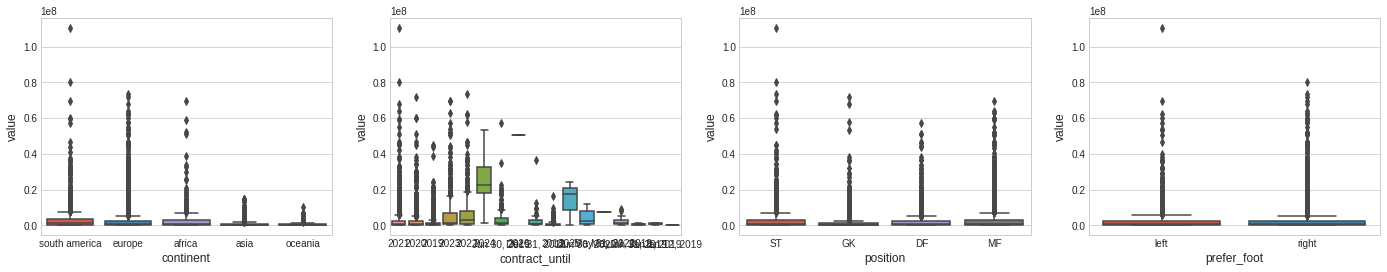

In [ ]:
f, ax = plt.subplots(1,4, figsize=(24,4))
ax = ax.flatten()
col_list = ["continent","contract_until","position","prefer_foot"]
print(col_list)
for i in range(len(col_list)):
  sns.boxplot(data=df,x=col_list[i],y="value",ax=ax[i])
plt.show()

* **INSIGHT**

  * .continent feature에서 south america와 afirca의 이상치가 보입니다 처리가 필요할듯하며 이상치를 제외하면 europe의 가치가 가장 큽니다
  * .contract_until은 이상치도 눈에 보이지만 입력시 연도만 입력한 데이터와 연도와 월을 입력한 데이터의 혼입으로 월을 제거하는 처리 필요함
  *position은 이상치를 제외하면 GK의 가치가 가장 낮은것으로 보임 이상치를 어디로 정하냐에따라 ST의 가치가 변동됨으로 보입니다
  *preger_foot은 right의 count가 3배이상 많았지만 value에서는 근소한 차이만 보입니다
  *전체적으로 스포츠선수의 가치가 특정 선수들에게 훨씬 더 크게 적용됨으로 이상치를 어떻게 처리하는가가 관건인것으로 보입니다

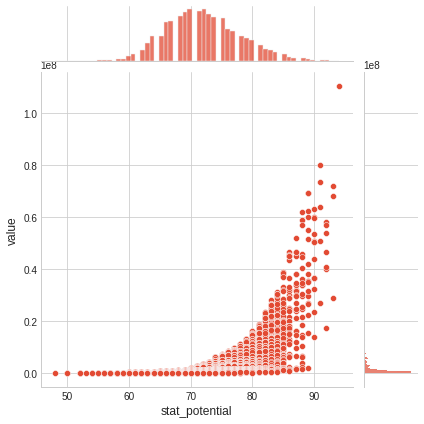

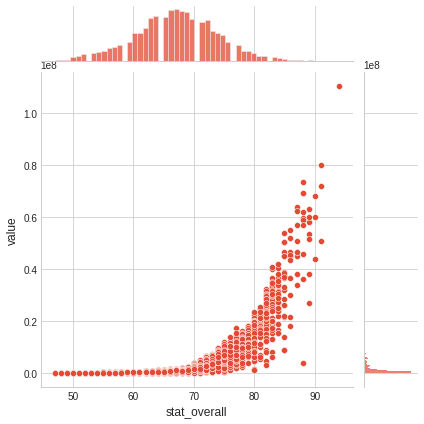

In [ ]:

col_list = ["age","reputation","stat_skill_moves"]
sns.jointplot(data=df, x="stat_potential" ,y='value')
sns.jointplot(data=df, x="stat_overall" ,y='value')
plt.show()

* **INSIGHT**

  * .현재 능력치가 높으면 가치가 가파르게 올라가는것을 볼수있다
  * .potential도 같은 모습의 그래프를 보여준다 전처리시 이산형으로 처리 가능해보입니다 

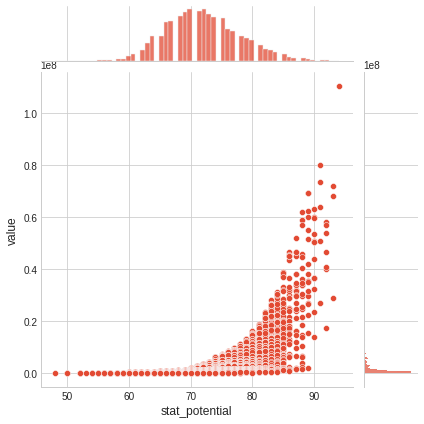

In [ ]:
sns.jointplot(data=df, x="stat_potential" ,y='value')
plt.show()

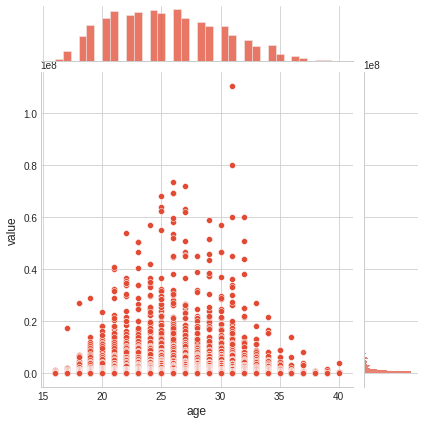

In [ ]:
sns.jointplot(x="age",y="value",data=df)
plt.show()

* **INSIGHT**

  * .age의 경우 25세에서 30세사이가 정점이고 그전과 그이후는 value가 내려가는 모습을 볼수있음
  * .이상치 처리 필요

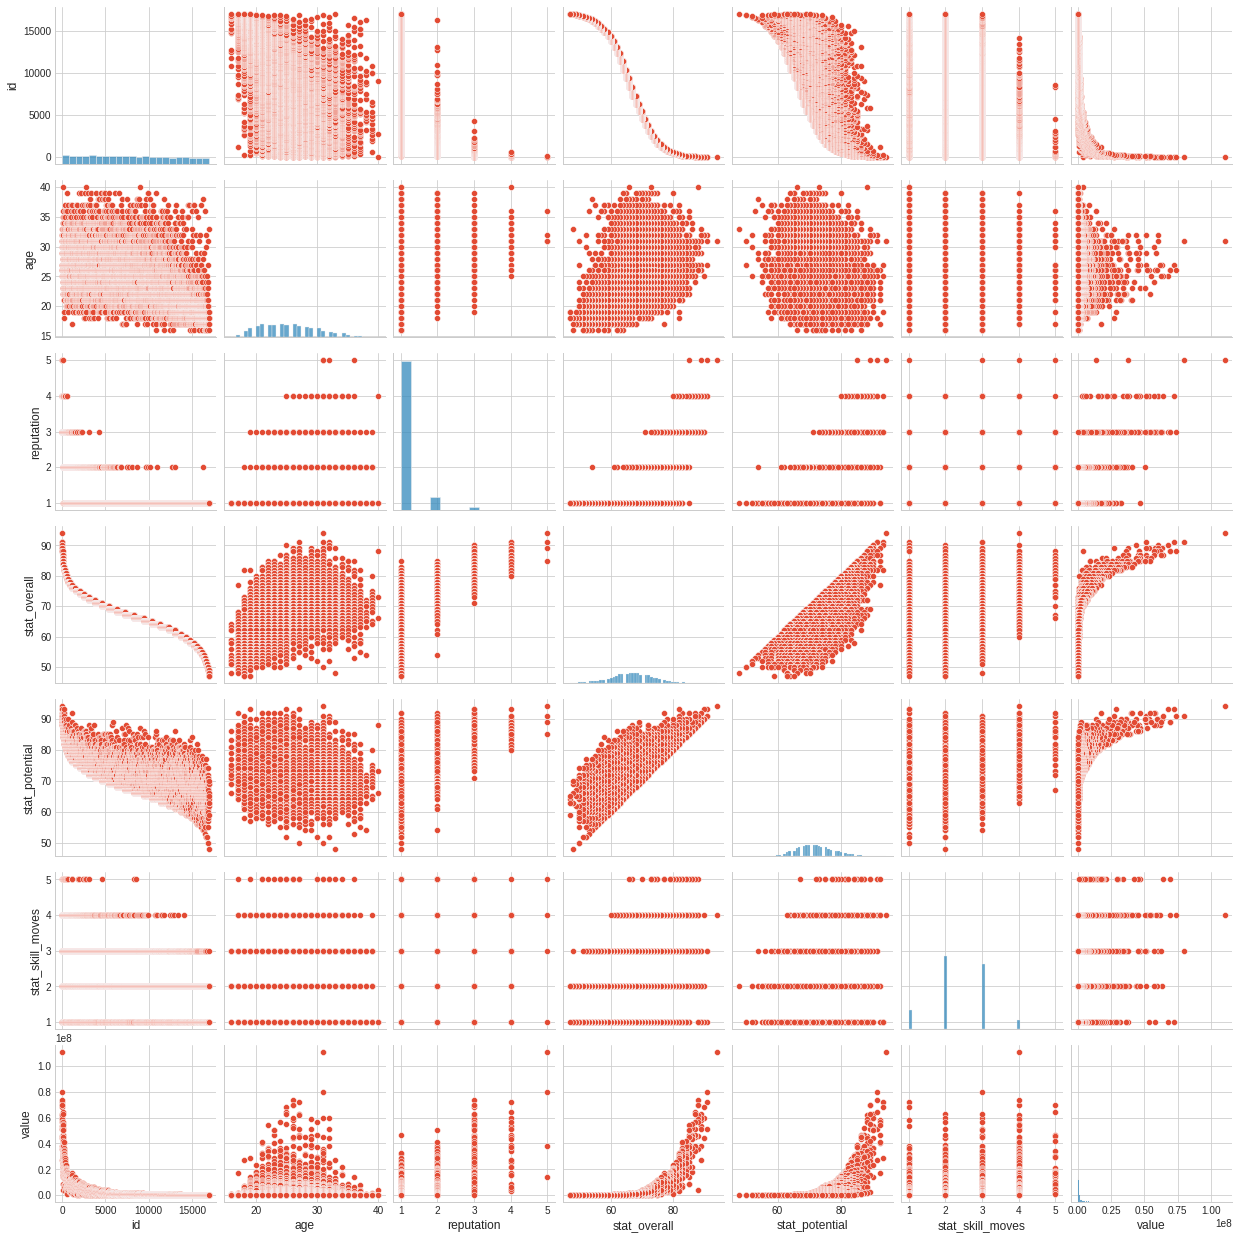

In [ ]:
sns.pairplot(df,palette='dark')
plt.show()

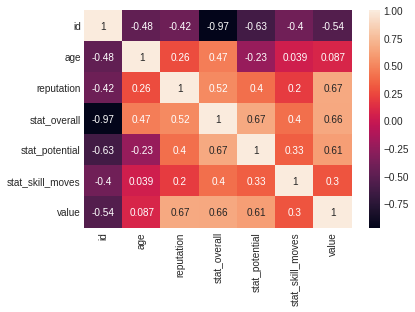

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show()

* **INSIGHT**

  * .나이의 경우 value와 관계가 없다고 표시 되지만 heatmap상에서의 오류인듯보입니다

  * id는 단순번호로 id와 stat_overall의 관계도 잘못된 정보로 보입니다
  *. 예상보다 reputation,stat_overall,stat_potential 각각 value와의 관계가 낮음
  

---
### **Summary**
---

* **INSIGHT**

  * .value와 연관성이 많은 속성은 다음과 같다
  * .reputation
  * .stat_overall
  * .stat_potential
  * .모두 예상보다는 연관성이 높지 않게 나왔다
  * .연관성은 높지 않게 나왔지만 예측에 도움 될수 있는 속성은 다음고 같다
  * .age 
  * .prefer_foot 데이터 형식(0/1)예정
  * .contract_until 데이터 입력 통일필요함(계약종료년/계약종료년월 두방식으로 혼입되어있음)
  * .continent 데이터형식 (1,2,3,4,5)
  * .position 데이터형식 (1,2,3,4)
  * .이 중에서 결측값이 있는 속성은 없다
  * .stat_potential과 stat_overall은 유사한 형태를 보임
  * .그 외 속성은 사용하지 않는다

## **3. 데이터 전처리 : 데이터 정제**

### **데이터 확인**


####**데이터 분할**

In [ ]:
drop_list = ['id','name']
train = df.drop(drop_list,axis=1)

* **INSIGHT**
  * . 의미없는 feature id와 name제거

In [ ]:
train

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...
8927,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0
8928,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0
8929,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0
8930,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0


In [ ]:
for i in range(len(train['contract_until'])):
  if len(train['contract_until'][i])> 4:
    (train['contract_until'][i])=train['contract_until'][i][-4:]
  (train['contract_until'][i])=int(train['contract_until'][i])-2018

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


* **INSIGHT**
  * . contract_until에 계약종료일이 년월일로 입력되어 있는 데이터와 연도로 되어있는 데이터가 섞여서 존재함으로 년월일을 연도로 통일한뒤 2018:0 2019:1~ 로 변환함

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               8932 non-null   int64  
 1   continent         8932 non-null   object 
 2   contract_until    8932 non-null   object 
 3   position          8932 non-null   object 
 4   prefer_foot       8932 non-null   object 
 5   reputation        8932 non-null   float64
 6   stat_overall      8932 non-null   int64  
 7   stat_potential    8932 non-null   int64  
 8   stat_skill_moves  8932 non-null   float64
 9   value             8932 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 697.9+ KB



## **4. 데이터 전처리 : 데이터 변환**
---
|feature|현재값 | 처리값|
|--|--|--|
| value|||
	continent |south america/europe/africa/asia/oceania | 0/1/2/3/4/5
	position| ST/GK/DF/MF | 0/1/2/3
  prefer_foot| left/right| 0/1


In [ ]:
mask_s = train["continent"] =='south america'
mask_e = train["continent"] =='europe'
mask_af = train["continent"] =='africa'
mask_as = train["continent"] =='asia'
mask_o = train["continent"] =='oceania'
train.loc[mask_s, "continent"] =0
train.loc[mask_e, "continent"] =1
train.loc[mask_af, "continent"] =2
train.loc[mask_as, "continent"] =3
train.loc[mask_o, "continent"] =4

In [ ]:
mask_sf = train["position"] =='ST'
mask_gf = train["position"] =='GK'
mask_df = train["position"] =='DF'
mask_mf = train["position"] =='MF'
train.loc[mask_sf, "position"] =0
train.loc[mask_gf, "position"] =1
train.loc[mask_df, "position"] =2
train.loc[mask_mf, "position"] =3


In [ ]:
mask_r = train["prefer_foot"] =='right'
mask_l = train["prefer_foot"] =='left'
train.loc[mask_r, "prefer_foot"] =0
train.loc[mask_l, "prefer_foot"] =1

In [ ]:
train.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,31,0,3,0,1,5.0,94,94,4.0,110500000.0
1,27,1,2,1,0,4.0,91,93,1.0,72000000.0
2,31,0,3,0,0,5.0,91,91,3.0,80000000.0
3,32,1,2,2,0,4.0,91,91,3.0,51000000.0
4,25,1,3,1,0,3.0,90,93,1.0,68000000.0


* **INSIGHT**
  * . contintent,postition,prefer_foot 데이터 형식 변형 완료 
  * . stat_overall	stat_potential 정규화 필요하다


## **5. 결과**
---

---
###**테스트셋을 위한 전처리 과정 함수화**
---

In [ ]:
def preproces_FIFA(df):
  #필요없는 속성 제거
  drop_list = ['id','name']
  df_pre = df.drop(drop_list,axis=1)
  #결측값 행삭제
  df_pre = df_pre.dropna(axis=0)
  #이상치 제거
  for i in range(len(df_pre['contract_until'])):
    if len(df_pre['contract_until'][i])> 4:
      (df_pre['contract_until'][i])=df_pre['contract_until'][i][-4:]
    (df_pre['contract_until'][i])=int(df_pre['contract_until'][i])-2018
  #데이터 변환
  mask_s = df_pre["continent"] =='south america'
  mask_e = df_pre["continent"] =='europe'
  mask_af = df_pre["continent"] =='africa'
  mask_as = df_pre["continent"] =='asia'
  mask_o = df_pre["continent"] =='oceania'
  df_pre.loc[mask_s, "continent"] =0
  df_pre.loc[mask_e, "continent"] =1
  df_pre.loc[mask_af, "continent"] =2
  df_pre.loc[mask_as, "continent"] =3
  df_pre.loc[mask_o, "continent"] =4

  mask_sf = df_pre["position"] =='ST'
  mask_gf = df_pre["position"] =='GK'
  mask_df = df_pre["position"] =='DF'
  mask_mf = df_pre["position"] =='MF'
  df_pre.loc[mask_sf, "position"] =0
  df_pre.loc[mask_gf, "position"] =1
  df_pre.loc[mask_df, "position"] =2
  df_pre.loc[mask_mf, "position"] =3

  mask_r = df_pre["prefer_foot"] =='right'
  mask_l = df_pre["prefer_foot"] =='left'
  df_pre.loc[mask_r, "prefer_foot"] =0
  df_pre.loc[mask_l, "prefer_foot"] =1
  #이산화 하지 않음

  #min-max정규화
  for col in ['age','contract_until','reputation',	'stat_overall',	'stat_potential',	'stat_skill_moves']:
    df_pre[col] = (df_pre[col]-df_pre[col].min())/(df_pre[col].max()-df_pre[col].min())
 #Z-score정규화
 # for col in df:
 #df[col] = (df[col]-df[col].median())/df[col].std()
  return df_pre
 

#### **train 데이터셋**

In [ ]:
df_train =pd.read_csv("FIFA_train.csv")
train=preproces_FIFA(df_train)
train['value'] = (train['value']-train['value'].min())/(train['value'].max()-train['value'].min())
train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0.625000,0,0.375,0,1,1.00,1.000000,1.000000,0.75,1.000000
1,0.458333,1,0.25,1,0,0.75,0.936170,0.978261,0.00,0.651552
2,0.625000,0,0.375,0,0,1.00,0.936170,0.934783,0.50,0.723957
3,0.666667,1,0.25,2,0,0.75,0.936170,0.934783,0.50,0.461490
4,0.375000,1,0.375,1,0,0.50,0.914894,0.978261,0.00,0.615350


#### **test 데이터셋**

In [ ]:
df_test =pd.read_csv("FIFA_test.csv")
test=preproces_FIFA(df_test)
test.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,0.653846,1,0.5,0,0,1.00,1.000000,0.976744,1.00
1,0.384615,0,0.5,0,0,1.00,0.957447,0.953488,1.00
2,0.423077,1,0.625,3,0,0.75,0.936170,0.930233,0.75
3,0.423077,1,0.25,0,0,0.75,0.936170,0.906977,0.75
4,0.615385,1,0.25,3,0,0.75,0.936170,0.906977,0.75


---
###**전처리 결과 확인**
---

#### **train 데이터셋**

['age', 'continent', 'contract_until', 'position', 'prefer_foot', 'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves', 'value']


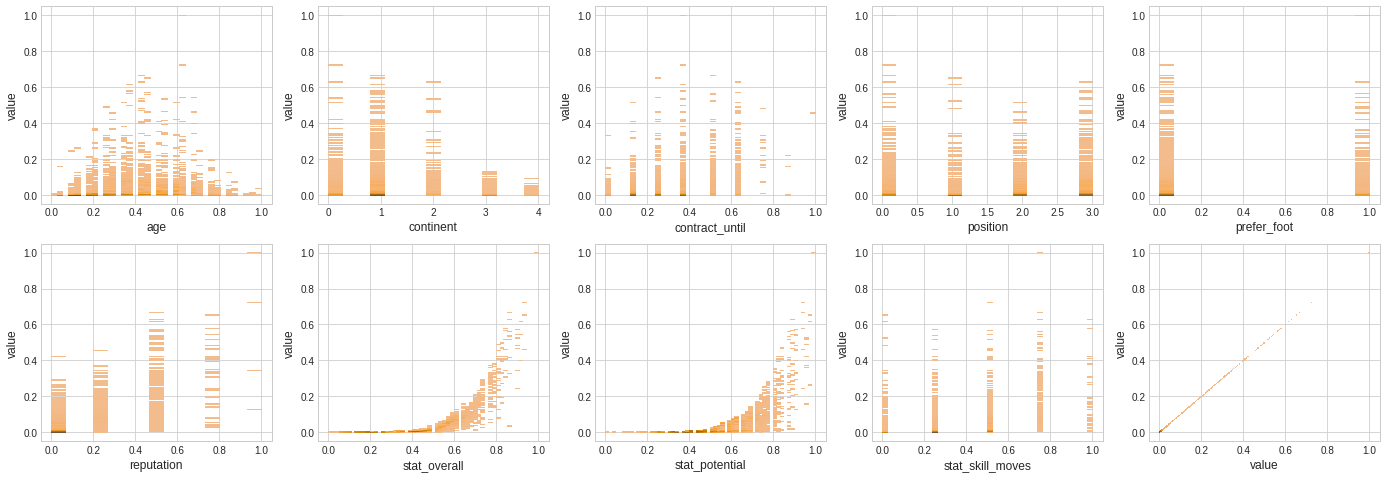

In [ ]:
f, ax = plt.subplots(2,5, figsize=(24,8))
ax = ax.flatten()
col_list = list(train.columns)
print(col_list)
for i in range(len(col_list)):
  sns.histplot(data=train, x= col_list[i],y='value',ax=ax[i],color='orange')
plt.show()

#### **test 데이터셋**

['age', 'continent', 'contract_until', 'position', 'prefer_foot', 'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves']


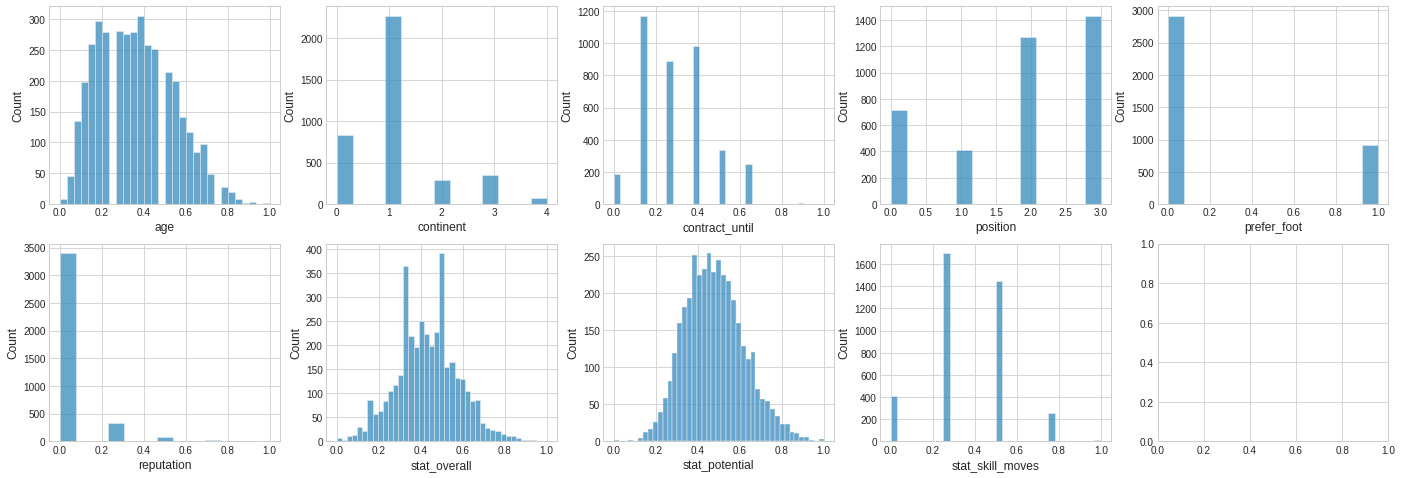

In [ ]:
f, ax = plt.subplots(2,5, figsize=(24,8))
ax = ax.flatten()
col_list = list(test.columns)
print(col_list)
for i in range(len(col_list)):
  sns.histplot(data=test, x= col_list[i],ax=ax[i])
plt.show()

In [ ]:
train.to_csv("train_pre_FIFA.csv")
test.to_csv("test_pre_FIFA.csv")
